In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv('../data/raw/Airbnb_Open_Data.csv', low_memory=False)

### EDA RAW

In [94]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [95]:
df.tail()

id                              NAME      host id  \
102594  6092437        Spare room in Williamsburg  12312296767   
102595  6092990     Best Location near Columbia U  77864383453   
102596  6093542    Comfy, bright room in Brooklyn  69050334417   
102597  6094094  Big Studio-One Stop from Midtown  11160591270   
102598  6094647              585 sf Luxury Studio  68170633372   

       host_identity_verified    host name neighbourhood group  \
102594               verified         Krik            Brooklyn   
102595            unconfirmed        Mifan           Manhattan   
102596            unconfirmed        Megan            Brooklyn   
102597            unconfirmed  Christopher              Queens   
102598            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...  \
102594         Williamsburg  40.70862 -73.94651  United States  ...   
102595  Morningside Heights  40.80460 -73.96545  United States  ...   
102596           Park Slope  40.67505 -73.98045  United States  ...   
102597     Long Island City  40.74989 -73.93777  United States  ...   
102598      Upper West Side  40.76807 -73.98342  United States  ...   

       service fee minimum nights number of reviews last review  \
102594       $169             1.0               0.0         NaN   
102595       $167             1.0               1.0    7/6/2015   
102596       $198             3.0               0.0         NaN   
102597       $109             2.0               5.0  10/11/2015   
102598       $206             1.0               0.0         NaN   

        reviews per month review rate number calculated host listings count  \
102594                NaN                3.0                            1.0   
102595               0.02                2.0                            2.0   
102596                NaN                5.0                            1.0   
102597               0.10                3.0                            1.0   
102598                NaN                3.0                            1.0   

        availability 365                                        house_rules  \
102594             227.0  No Smoking No Parties or Events of any kind Pl...   
102595             395.0  House rules: Guests agree to the following ter...   
102596             342.0                                                NaN   
102597             386.0                                                NaN   
102598              69.0                                                NaN   

       license  
102594     NaN  
102595     NaN  
102596     NaN  
102597     NaN  
102598     NaN  

[5 rows x 26 columns]

In [96]:
df.sample(n=3)

id                                               NAME  \
17424  10624611  Huge Room in Penthouse Apartment (Upper West S...   
70406  39886570         Quiet and Comfort Near Columbia University   
16671  10208729     1BR Luxurious Furnished NY Apt - Times Square!   

           host id host_identity_verified host name neighbourhood group  \
17424  61788161922            unconfirmed  Samantha           Manhattan   
70406  55624169556            unconfirmed      Lisa           Manhattan   
16671  76002709760            unconfirmed      Kara           Manhattan   

          neighbourhood       lat      long        country  ... service fee  \
17424   Upper West Side  40.77841 -73.98028  United States  ...       $207    
70406            Harlem  40.80384 -73.95419  United States  ...       $237    
16671  Theater District  40.75956 -73.98512  United States  ...        $44    

      minimum nights number of reviews last review  reviews per month  \
17424            1.0               4.0   3/25/2017               0.11   
70406            2.0              27.0   5/26/2019               0.57   
16671           30.0               0.0         NaN                NaN   

      review rate number calculated host listings count  availability 365  \
17424                4.0                            1.0               0.0   
70406                1.0                            1.0             320.0   
16671                4.0                          121.0             317.0   

               house_rules license  
17424  - Check out by 10am     NaN  
70406                  NaN     NaN  
16671                  NaN     NaN  

[3 rows x 26 columns]

In [97]:
df.shape

(102599, 26)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [99]:
df.columns.tolist()

['id',
 'NAME',
 'host id',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'lat',
 'long',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'Construction year',
 'price',
 'service fee',
 'minimum nights',
 'number of reviews',
 'last review',
 'reviews per month',
 'review rate number',
 'calculated host listings count',
 'availability 365',
 'house_rules',
 'license']

In [100]:
df.axes

[RangeIndex(start=0, stop=102599, step=1),
 Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
        'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
        'country code', 'instant_bookable', 'cancellation_policy', 'room type',
        'Construction year', 'price', 'service fee', 'minimum nights',
        'number of reviews', 'last review', 'reviews per month',
        'review rate number', 'calculated host listings count',
        'availability 365', 'house_rules', 'license'],
       dtype='object')]

In [101]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [102]:
df.dtypes.value_counts()

object     15
float64     9
int64       2
Name: count, dtype: int64

In [103]:
df.nunique()

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [104]:
numb_count = df.isna().sum().sort_values(ascending=False)
numb_count

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

In [105]:
numb_percent = (df.isna().mean()*100).round(2).sort_values(ascending=False)
numb_percent

license                           100.00
house_rules                        50.81
last review                        15.49
reviews per month                  15.48
country                             0.52
availability 365                    0.44
minimum nights                      0.40
host name                           0.40
review rate number                  0.32
calculated host listings count      0.31
host_identity_verified              0.28
service fee                         0.27
NAME                                0.24
price                               0.24
Construction year                   0.21
number of reviews                   0.18
country code                        0.13
instant_bookable                    0.10
cancellation_policy                 0.07
neighbourhood group                 0.03
neighbourhood                       0.02
long                                0.01
lat                                 0.01
id                                  0.00
host id         

In [106]:
df.describe()

id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

### EDA CLEANING

In [107]:
df_clean = df.copy()

#### Data types

In [108]:
df_clean.columns = [col.lower().replace(' ', '_') for col in df_clean.columns]
df_clean.head()

id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service_fee minimum_nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number_of_reviews last_review  reviews_per_month review_rate_number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated_host_listings_count  availability_365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [109]:
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'], errors='coerce').dt.date

In [110]:
for i in ['price', 'service_fee']:
    if i in df_clean.columns:
        df_clean[i] = (df_clean[i].astype('string')
                       .str.replace(r'[^\d\.\-]', '', regex=True)
                       .replace('', np.nan).astype(float))

In [111]:
for i in ['minimum_nights', 'number_of_reviews', 'availability_365', 'construction_year', 'review_rate_number']:
    if i in df_clean.columns:
        df_clean[i] = pd.to_numeric(df_clean[i], errors='coerce')
        df_clean[i] = df_clean[i].round().astype('Int64')

In [112]:
df_clean['instant_bookable'] = (df_clean['instant_bookable']
                                .astype('string')
                                .str.strip()
                                .str.lower()
                                .eq('true')
                                .astype('boolean')
)


In [113]:
df_clean['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

In [114]:
df_clean['neighbourhood_group'] = (df_clean['neighbourhood_group']
                 .astype("string")
                 .str.strip()
                 .str.replace(r"\s+", " ", regex=True)
                 .str.title()) 

In [115]:
fix_map = {
    "Brookin": "Brooklyn",
    "Brookln" : "Brooklyn",
    "Manhatan": "Manhattan",
}
df_clean['neighbourhood_group'] = df_clean['neighbourhood_group'].replace(fix_map)

In [116]:
df_clean['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: count, dtype: Int64

Data Wrangler, kolumna license 99% wartosci missing - bezużyteczna 

Dodatkowo kolumna host_id jest unikalna i moim zdaniem nie bedzie potrzebna do analiz, mamy index automatyczny plus w pliku

Kolumna country_code jest taka sama dla wszystkich wartości US (dane z USA)

In [117]:
df_clean = df_clean.drop(columns=['license', 'host_id', 'country_code', 'id'])

In [118]:
numb_percent = (df_clean.isna().mean()*100).round(2).sort_values(ascending=False)
numb_percent

house_rules                       50.81
last_review                       15.49
reviews_per_month                 15.48
country                            0.52
availability_365                   0.44
host_name                          0.40
minimum_nights                     0.40
review_rate_number                 0.32
calculated_host_listings_count     0.31
host_identity_verified             0.28
service_fee                        0.27
price                              0.24
name                               0.24
construction_year                  0.21
number_of_reviews                  0.18
instant_bookable                   0.10
cancellation_policy                0.07
neighbourhood_group                0.03
neighbourhood                      0.02
lat                                0.01
long                               0.01
room_type                          0.00
dtype: float64

In [119]:
df_clean.describe()

lat           long  construction_year          price  \
count  102591.000000  102591.000000           102385.0  102352.000000   
mean       40.728094     -73.949644        2012.487464     625.293536   
std         0.055857       0.049521           5.765556     331.671614   
min        40.499790     -74.249840             2003.0      50.000000   
25%        40.688740     -73.982580             2007.0     340.000000   
50%        40.722290     -73.954440             2012.0     624.000000   
75%        40.762760     -73.932350             2017.0     913.000000   
max        40.916970     -73.705220             2022.0    1200.000000   

         service_fee  minimum_nights  number_of_reviews  reviews_per_month  \
count  102326.000000        102190.0           102416.0       86720.000000   
mean      125.026924        8.135845          27.483743           1.374022   
std        66.325739       30.553781          49.508954           1.746621   
min        10.000000         -1223.0                0.0           0.010000   
25%        68.000000             2.0                1.0           0.220000   
50%       125.000000             3.0                7.0           0.740000   
75%       183.000000             5.0               30.0           2.000000   
max       240.000000          5645.0             1024.0          90.000000   

       review_rate_number  calculated_host_listings_count  availability_365  
count            102273.0                   102280.000000          102151.0  
mean             3.279106                        7.936605        141.133254  
std              1.284657                       32.218780        135.435024  
min                   1.0                        1.000000             -10.0  
25%                   2.0                        1.000000               3.0  
50%                   3.0                        1.000000              96.0  
75%                   4.0                        2.000000             269.0  
max                   5.0                      332.000000            3677.0

In [120]:
df_clean['review_rate_number'].value_counts()

review_rate_number
5    23369
4    23329
3    23265
2    23098
1     9212
Name: count, dtype: Int64

In [121]:
df_clean['instant_bookable'].value_counts()

instant_bookable
False    51474
True     51020
Name: count, dtype: Int64

In [122]:
df_clean['cancellation_policy'].value_counts()

cancellation_policy
moderate    34343
strict      34106
flexible    34074
Name: count, dtype: int64

In [123]:
df_clean['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: count, dtype: Int64

In [124]:
df_clean['neighbourhood'].value_counts()

neighbourhood
Bedford-Stuyvesant        7937
Williamsburg              7775
Harlem                    5466
Bushwick                  4982
Hell's Kitchen            3965
                          ... 
Rossville                    3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

In [125]:
uniq_values = df_clean['neighbourhood'].unique().shape[0]
print(f'Total unique values: {uniq_values}')
print(f'[%] of unique values: {round(uniq_values/df_clean['neighbourhood'].shape[0] * 100, 2)}%')

Total unique values: 225
[%] of unique values: 0.22%


In [126]:
df_clean['room_type'].value_counts()

room_type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64

In [127]:
df_clean['minimum_nights'].describe()

count     102190.0
mean      8.135845
std      30.553781
min        -1223.0
25%            2.0
50%            3.0
75%            5.0
max         5645.0
Name: minimum_nights, dtype: Float64

In [ ]:
#df_clean.to_csv('../data/processed/Airbnb_Open_Data_ML.csv')

**plik Airbnb_Open_Data_ML.csv** jest plikiem, który będzie stanowił podstawę do uczenia maszynowego.
Cechy: [`name, host_identity_verified, host_name, neighbourhood_group, neighbourhood, lat, long, country, instant_bookable, cancellation_policy, room_type,construction_year,price, service_fee,minimum_nights, number_of_reviews, last_review, reviews_per_month, review_rate_number, calculated_host_listings_count,availability_365, house_rules`]

Dla większości cech braki są mało istotne dlatego nie będe ich usuwał na tym etapie, a cechy `house_rules`, `last_review` i `reviews_per_month` są moim zdaniem mało istotne w wizualizacjach jako główne składowe wykresy (poza tym wykresy pomijają NaN)

Większa analiza cech i związanych z nimi brakami będzie tematem działań na etapie uczenia maszynowego. Będzie ona uzależniona od wybranego celu, podejścia i modelu (tekst NLP)

### EDA VIZUALIZATION

In [129]:
df_clean.columns.to_list()

['name',
 'host_identity_verified',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'lat',
 'long',
 'country',
 'instant_bookable',
 'cancellation_policy',
 'room_type',
 'construction_year',
 'price',
 'service_fee',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'review_rate_number',
 'calculated_host_listings_count',
 'availability_365',
 'house_rules']

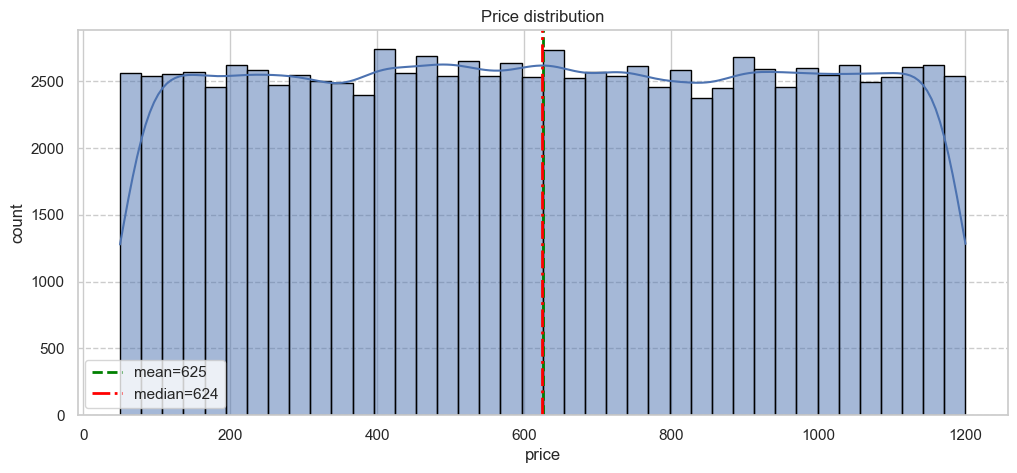

In [131]:
x = df_clean["price"].dropna()
m, med = x.mean(), x.median()

plt.figure(figsize=(12, 5))
sns.histplot(df_clean['price'], bins=40, edgecolor='black', kde=True)
plt.axvline(m,   ls="--", color='green', lw=2, label=f"mean={m:.0f}")
plt.axvline(med, ls="-.", color='red', lw=2, label=f"median={med:.0f}")
plt.title('Price distribution', )
plt.xlabel('price')
plt.ylabel('count')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

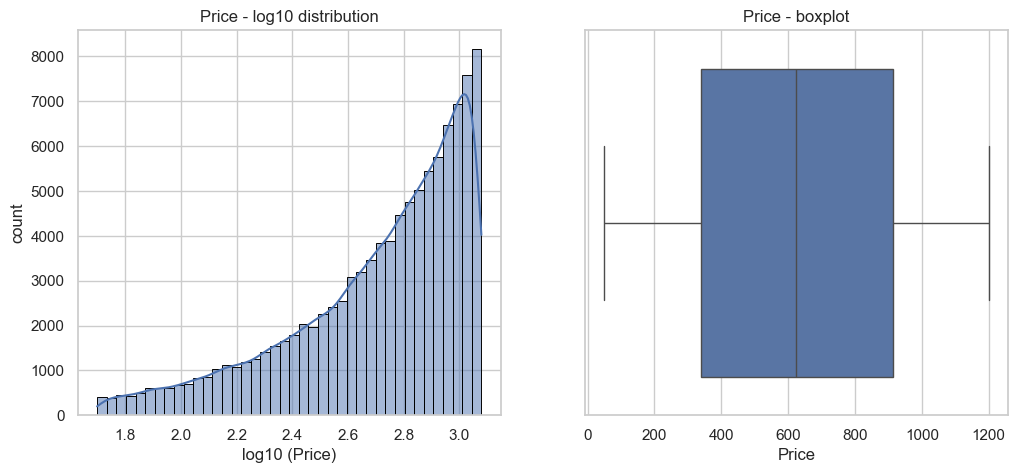

In [132]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#1 hist z funkcją logarytmiczną
sns.histplot(np.log10(df_clean['price']), bins=40, edgecolor='black', kde=True, ax=ax1)
ax1.set_title('Price - log10 distribution')
ax1.set_xlabel('log10 (Price)')
ax1.set_ylabel('count')

#2 boxplot ceny
sns.boxplot(x='price', data=df_clean, showfliers=True, ax=ax2)
ax2.set_title('Price - boxplot')
ax2.set_xlabel('Price')

plt.show()

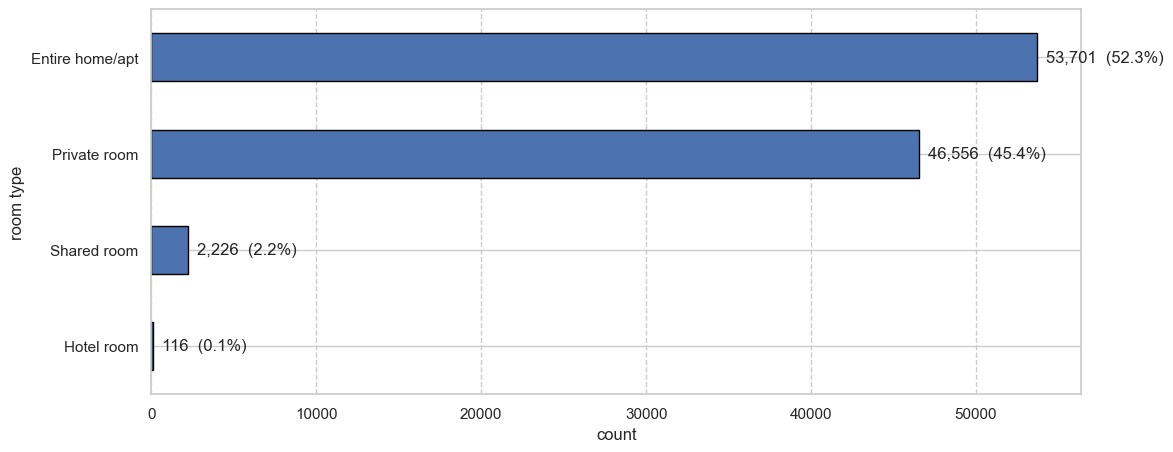

In [133]:
room_type = df_clean['room_type'].value_counts().sort_values(ascending=True)
total = int(room_type.sum())  # łączna liczba obserwacji w tej kolumnie (do %)

plt.figure(figsize=(12,5))
ax = room_type.plot(kind='barh', edgecolor='black')
plt.xlabel('count')
plt.ylabel('room type')

offset = room_type.max() * 0.01  
for i, (cat, val) in enumerate(room_type.items()):  
    label = f"{val:,}  ({val/total:.1%})"    
    ax.text(val + offset, i, label, va="center")  

plt.grid(axis='x', linestyle='--')
plt.show()

<Figure size 1200x500 with 0 Axes>

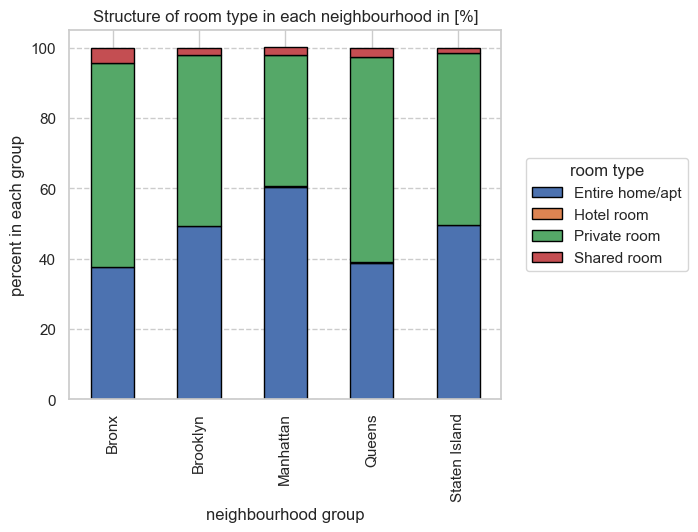

In [134]:
room_type_neigh = pd.crosstab(df_clean['neighbourhood_group'], df_clean['room_type'], normalize='index')
room_type_neigh = (room_type_neigh * 100).round(1)

plt.figure(figsize=(12, 5))
ax = room_type_neigh.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('Structure of room type in each neighbourhood in [%]')
plt.xlabel('neighbourhood group')
plt.ylabel('percent in each group')
plt.grid(axis='y', linestyle='--')
ax.legend(title='room type', loc='center right', bbox_to_anchor=(1.45, 0.5))
plt.subplots_adjust(right=0.8)
plt.show()



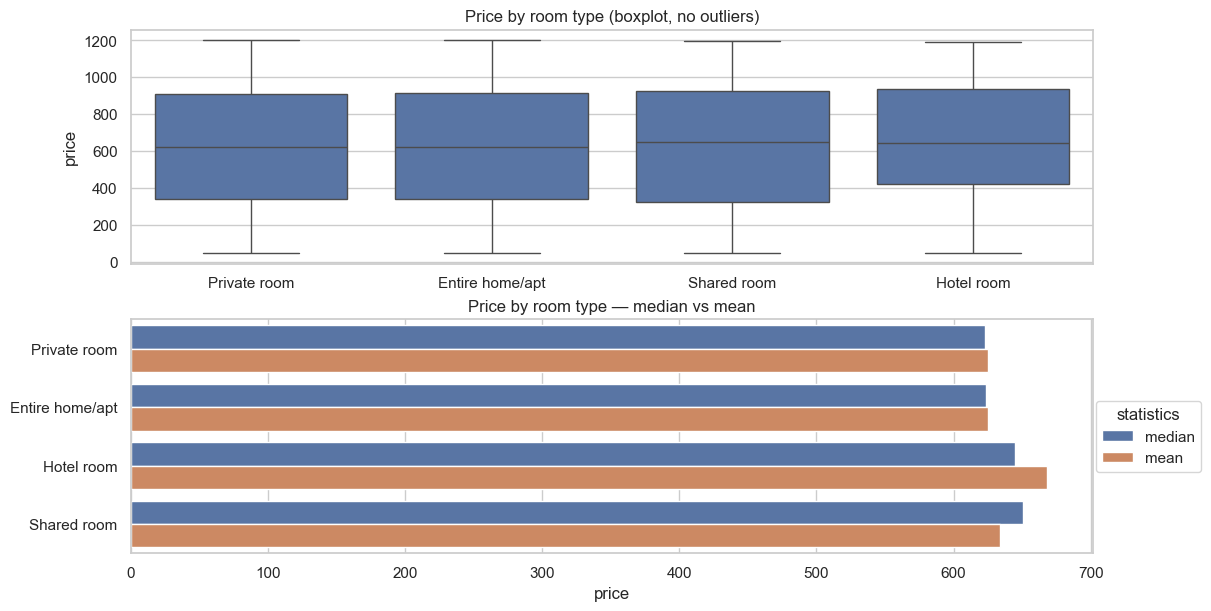

In [135]:
# --- dane do drugiego wykresu ---
stats = (df_clean.dropna(subset=["price","room_type"])
         .groupby("room_type", as_index=False)
         .agg(median=("price","median"), mean=("price","mean")))
order = stats.sort_values("median")["room_type"]  # tylko dla ładnej kolejności
melted = stats.melt(id_vars="room_type", var_name="stat", value_name="price")

# --- dwa wykresy: JEDEN POD DRUGIM ---
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 6), constrained_layout=True)

# 1) BOXPLOT (góra)
sns.boxplot(data=df_clean, x="room_type", y="price", showfliers=False, ax=ax1)
ax1.set_title("Price by room type (boxplot, no outliers)")
ax1.set_xlabel("")
ax1.set_ylabel("price")

# 2) MEDIANA vs MEAN (dół)
sns.barplot(data=melted, x="price", y="room_type",
            hue="stat", order=order, orient="h", ax=ax2)
ax2.set_title("Price by room type — median vs mean")
ax2.set_xlabel("price"); ax2.set_ylabel("")
ax2.legend(title='statistics', loc='center right', bbox_to_anchor=(1.12, 0.5))

plt.show()


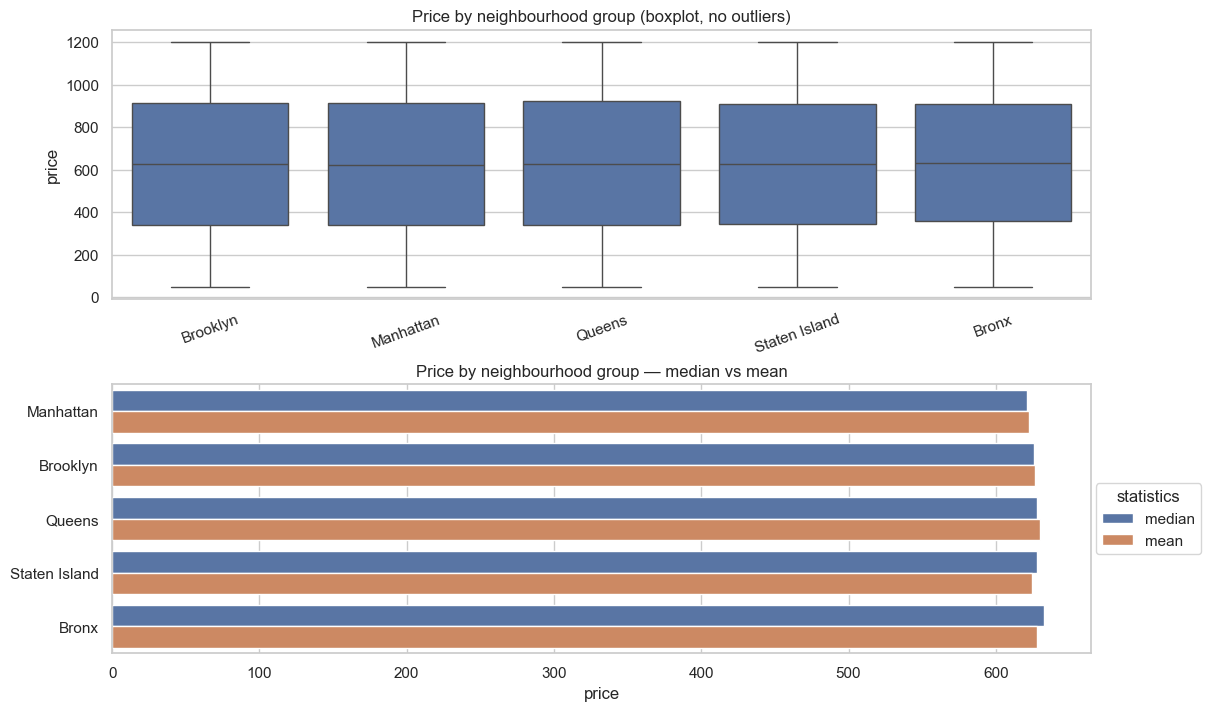

In [136]:
# --- agregacje do dolnego wykresu ---
stats = (df_clean
         .dropna(subset=["price", "neighbourhood_group"])
         .groupby("neighbourhood_group", as_index=False)
         .agg(median=("price", "median"),
              mean=("price",   "mean")))

# kolejność wg mediany (czytelniej); nie chcesz sortować → ustaw order=None
order = stats.sort_values("median")["neighbourhood_group"]
melted = stats.melt(id_vars="neighbourhood_group", var_name="stat", value_name="price")

# --- dwa wykresy: jeden pod drugim ---
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 7), constrained_layout=True)

# 1) BOXLOT (góra)
sns.boxplot(data=df_clean,
            x="neighbourhood_group", y="price",
            showfliers=False, ax=ax1)
ax1.set_title("Price by neighbourhood group (boxplot, no outliers)")
ax1.set_xlabel("")
ax1.set_ylabel("price")
ax1.tick_params(axis='x', rotation=20)

# 2) MEDIANA vs MEAN (dół)
sns.barplot(data=melted,
            x="price", y="neighbourhood_group",
            hue="stat", order=order, orient="h", ax=ax2)
ax2.set_title("Price by neighbourhood group — median vs mean")
ax2.set_xlabel("price"); ax2.set_ylabel("")
ax2.legend(title='statistics', loc='center right', bbox_to_anchor=(1.12, 0.5))

plt.show()


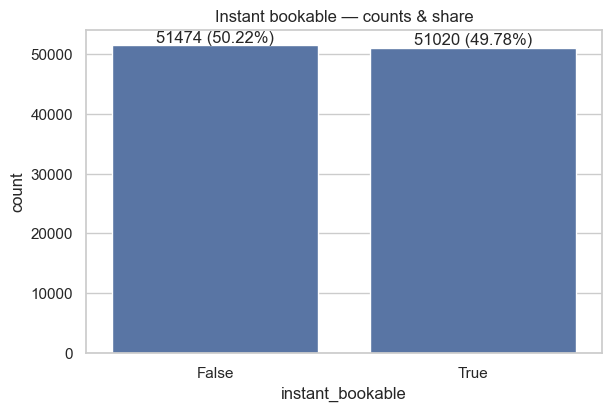

In [137]:
counts = df_clean["instant_bookable"].value_counts(dropna=True)
perc = (counts / counts.sum() * 100).round(2)

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
sns.barplot(x=counts.index.astype(str), y=counts.values, ax=ax)
for i, v in enumerate(counts.values):
    ax.text(i, v, f"{v} ({perc.iloc[i]}%)", ha="center", va="bottom")
ax.set_title("Instant bookable — counts & share")
ax.set_xlabel("instant_bookable"); ax.set_ylabel("count")
plt.show()

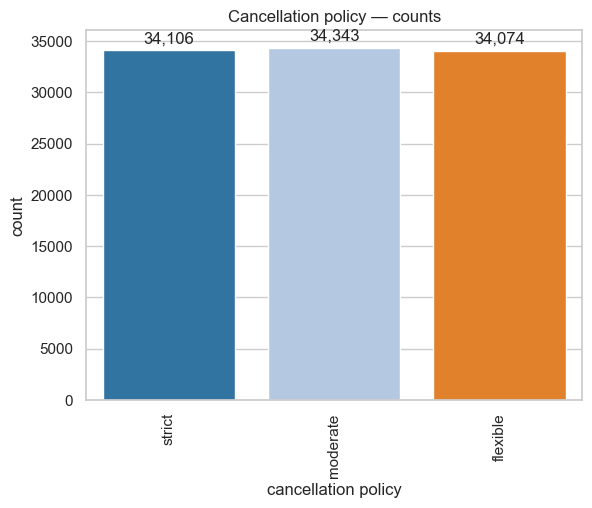

In [138]:
ax = sns.countplot(data=df_clean, x='cancellation_policy', hue='cancellation_policy', palette='tab20', legend=False)
ax.set_title('Cancellation policy — counts')
ax.set_xlabel('cancellation policy') 
ax.set_ylabel('count')
ax.tick_params(axis='x', rotation=90)


for p in ax.patches:
    n = int(p.get_height())
    ax.annotate(f"{n:,}",
                (p.get_x() + p.get_width()/2, n),
                ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

plt.show()

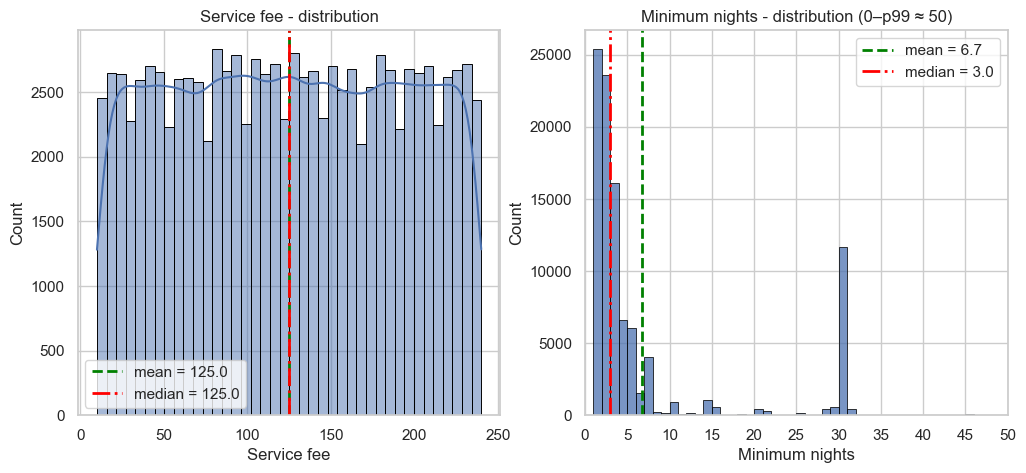

In [139]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#1 Service fee
service_fee = pd.to_numeric(df_clean["service_fee"], errors='coerce').dropna()

sns.histplot(service_fee, bins=40, edgecolor='black', kde=True, ax=ax1)
ax1.axvline(service_fee.mean(),  ls='--', color='green', lw=2, label=f"mean = {service_fee.mean():.1f}")
ax1.axvline(service_fee.median(), ls='-.', color='red', lw=2, label=f"median = {service_fee.median():.1f}")
ax1.set_title('Service fee - distribution')
ax1.set_xlabel('Service fee')
ax1.set_ylabel('Count')
ax1.legend()


#2 Minimum nights
mn = pd.to_numeric(df_clean["minimum_nights"], errors="coerce").dropna()
q99 = np.percentile(mn, 99)
mn_clip = mn[mn <= q99]   # wszystko poniżej p99

bins = range(0, int(q99) + 2)  # kosze co 1 (dla danych całkowitych)
sns.histplot(mn_clip, bins=bins, edgecolor="black", kde=False, ax=ax2)
m2, med2 = mn_clip.mean(), mn_clip.median()
ax2.axvline(m2,   ls="--", color="green", lw=2, label=f"mean = {m2:.1f}")
ax2.axvline(med2, ls="-.", color="red",   lw=2, label=f"median = {med2:.1f}")
ax2.set_xlim(0, q99)
ax2.set_xticks(range(0, int(q99)+1, 5))
ax2.set_title(f"Minimum nights - distribution (0–p99 ≈ {q99:.0f})")
ax2.set_xlabel("Minimum nights")
ax2.set_ylabel("Count")
ax2.legend()

plt.show()

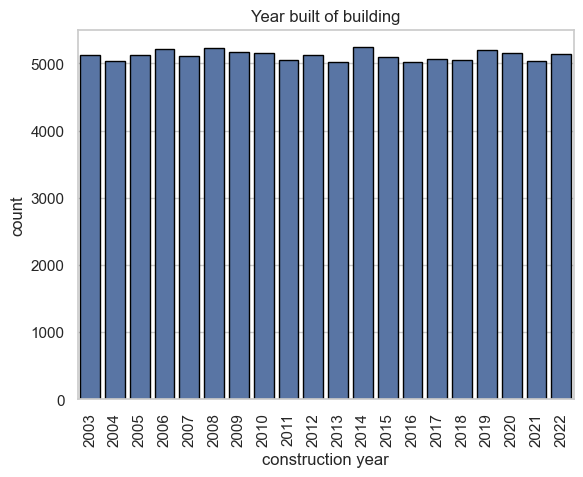

In [140]:
ax = sns.countplot(
    data=df_clean, 
    x='construction_year', 
    order=sorted(df_clean['construction_year'].dropna().unique()),
    edgecolor='black')
ax.set_title('Year built of building')
ax.set_xlabel('construction year')
ax.set_ylabel('count')
ax.tick_params(axis='x', rotation=90)
plt.show()


<Axes: >

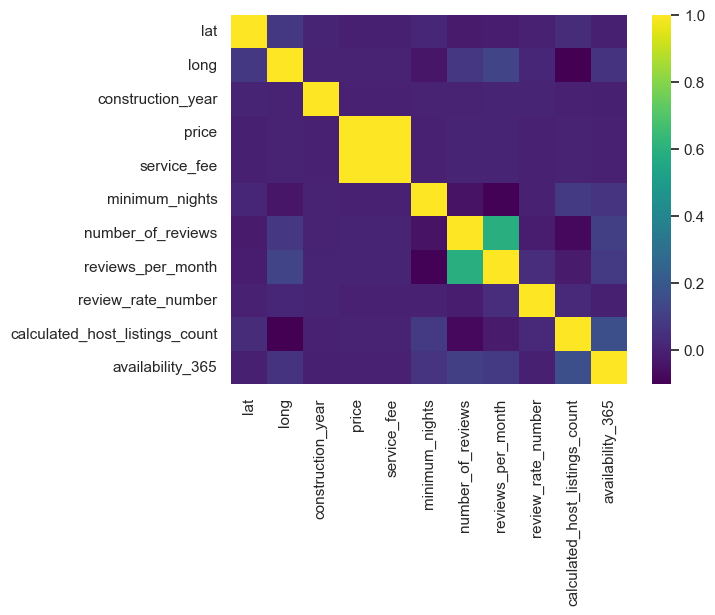

In [141]:
corr = df_clean.select_dtypes('number').corr()
sns.heatmap(corr, cmap='viridis')


In [142]:
import folium
import numpy as np
from branca.colormap import linear

df_map = df_clean.dropna(subset=['lat', 'long', 'price']).copy()

# centrum i podkład
m = folium.Map(
    location=[df_map['lat'].mean(), df_map['long'].mean()],
    zoom_start=11,
    tiles="OpenStreetMap"
)

# skala kolorów (przytnij p1–p99, żeby paleta była czytelna)
p1, p99 = np.percentile(df_map['price'], [1, 99])
cmap = linear.Purples_09.scale(p1, p99)   # gotowa paleta 9-stopniowa

# lekki sampling, by nie zabić przeglądarki
sample = df_map.sample(min(len(df_map), 5000), random_state=42)

for _, r in sample.iterrows():
    folium.CircleMarker(
        location=[r['lat'], r['long']],
        radius=2.5,
        fill=True, fill_opacity=0.7,
        color=None,
        fill_color=cmap(np.clip(r['price'], p1, p99)),  # kolor z palety
        popup=f"price: {r['price']}"
    ).add_to(m)

cmap.caption = "price (clipped to p1-p99)"
cmap.add_to(m)        # legenda kolorów
m                    
